In [1]:
import pandas as pd
import numpy as np
import env
import matplotlib.pyplot as plt
import seaborn as sns 
import os
from scipy import stats
import wrangle
from sklearn.linear_model import LinearRegression
from math import sqrt
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from sklearn.preprocessing import RobustScaler

In [2]:
df = pd.read_csv('zillow_data.csv')

In [3]:
df = wrangle.preparing_data_zillow(df)
df = df.drop(columns = ['Unnamed: 0', 'propertylandusedesc'])




/Users/divante/codeup-data-science/regression-exercises/wrangle.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.calculatedfinishedsquarefeet = df.calculatedfinishedsquarefeet.astype(int).copy()
/Users/divante/codeup-data-science/regression-exercises/wrangle.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fips = df.fips.astype(int).copy()
/Users/divante/codeup-data-science/regression-exercises/wrangle.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

In [4]:
df.calculatedfinishedsquarefeet.sort_values()
df.calculatedfinishedsquarefeet = df.calculatedfinishedsquarefeet[df.calculatedfinishedsquarefeet < 25000]

df = df.dropna()
df = df[df.taxvaluedollarcnt < df.taxvaluedollarcnt.quantile(.95)].copy()


In [5]:
train, validate, test = wrangle.split_data(df, df['taxvaluedollarcnt'])

In [6]:
lr = LinearRegression()
lr.fit(train[['calculatedfinishedsquarefeet']], train.taxvaluedollarcnt)
train['yhat'] = lr.predict(train[['calculatedfinishedsquarefeet']])
train['yhat_baseline'] = train['taxvaluedollarcnt'].mean()

In [7]:
train['residual'] = train['yhat'] - train['taxvaluedollarcnt']
train['residual_baseline'] = train['yhat_baseline'] - train['taxvaluedollarcnt']
train

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips,yhat,yhat_baseline,residual,residual_baseline
1571798,4.0,2.5,2987.0,885000.0,2006,13617.38,6059,580049.248064,363532.067232,-304950.751936,-521467.932768
1723553,3.0,2.0,3013.0,489511.0,1977,5768.57,6037,584607.353498,363532.067232,95096.353498,-125978.932768
718174,4.0,3.0,2572.0,390915.0,1986,4944.11,6037,507294.872860,363532.067232,116379.872860,-27382.932768
1663205,3.0,1.0,1589.0,321758.0,1959,4031.78,6037,334963.425088,363532.067232,13205.425088,41774.067232
1087891,3.0,2.0,1727.0,231737.0,1962,2708.80,6111,359156.446240,363532.067232,127419.446240,131795.067232
...,...,...,...,...,...,...,...,...,...,...,...
531544,3.0,2.0,1610.0,226464.0,1984,3001.96,6037,338644.971785,363532.067232,112180.971785,137068.067232
424806,2.0,1.0,900.0,227271.0,1938,3323.92,6037,214173.631075,363532.067232,-13097.368925,136261.067232
518081,3.0,3.0,1841.0,125533.0,1955,1731.15,6037,379141.985453,363532.067232,253608.985453,237999.067232
669341,3.0,2.0,1406.0,364412.0,1956,4559.86,6037,302881.375299,363532.067232,-61530.624701,-879.932768


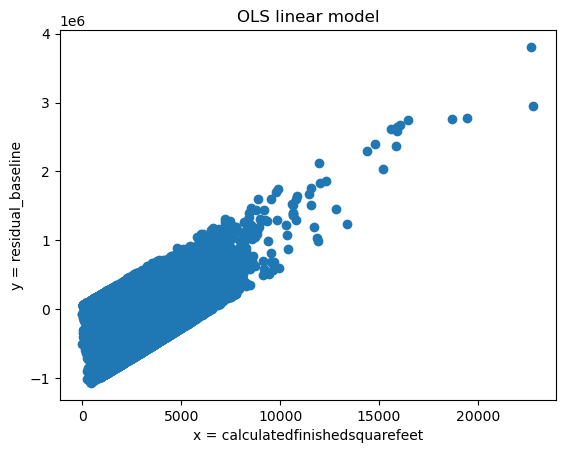

In [8]:
plt.scatter(train[['calculatedfinishedsquarefeet']] , train['residual'])
plt.xlabel('x = calculatedfinishedsquarefeet')
plt.ylabel('y = residual_baseline')
plt.title('OLS linear model')
plt.show()

#### Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.

In [9]:
train['residual^2'] = train.residual ** 2
SSE = sum(train['residual^2'])
SSE

5.244624799783556e+16

In [10]:
train.taxvaluedollarcnt.mean()

363532.06723244983

In [11]:
ESS = sum((train.yhat - train.taxvaluedollarcnt.mean())**2)
ESS

1.9763181828794024e+16

In [12]:
TSS = ESS + SSE
TSS

7.220942982662958e+16

In [13]:
MSE = SSE/len(train)
MSE

42992181337.38248

In [14]:
RMSE2 = sqrt(mean_squared_error(train.yhat, train.taxvaluedollarcnt))
RMSE2

207345.56020658242

Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average taxvaluedollarcnt amount).

In [15]:
train['baseline'] = train.taxvaluedollarcnt.mean()

# train['yhat_baseline'] = lr.predict(train[['calculatedfinishedsquarefeet']])
# train['residual_baseline'] = train['yhat_baseline'] - train['taxvaluedollarcnt']
train

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips,yhat,yhat_baseline,residual,residual_baseline,residual^2,baseline
1571798,4.0,2.5,2987.0,885000.0,2006,13617.38,6059,580049.248064,363532.067232,-304950.751936,-521467.932768,9.299496e+10,363532.067232
1723553,3.0,2.0,3013.0,489511.0,1977,5768.57,6037,584607.353498,363532.067232,95096.353498,-125978.932768,9.043316e+09,363532.067232
718174,4.0,3.0,2572.0,390915.0,1986,4944.11,6037,507294.872860,363532.067232,116379.872860,-27382.932768,1.354427e+10,363532.067232
1663205,3.0,1.0,1589.0,321758.0,1959,4031.78,6037,334963.425088,363532.067232,13205.425088,41774.067232,1.743833e+08,363532.067232
1087891,3.0,2.0,1727.0,231737.0,1962,2708.80,6111,359156.446240,363532.067232,127419.446240,131795.067232,1.623572e+10,363532.067232
...,...,...,...,...,...,...,...,...,...,...,...,...,...
531544,3.0,2.0,1610.0,226464.0,1984,3001.96,6037,338644.971785,363532.067232,112180.971785,137068.067232,1.258457e+10,363532.067232
424806,2.0,1.0,900.0,227271.0,1938,3323.92,6037,214173.631075,363532.067232,-13097.368925,136261.067232,1.715411e+08,363532.067232
518081,3.0,3.0,1841.0,125533.0,1955,1731.15,6037,379141.985453,363532.067232,253608.985453,237999.067232,6.431752e+10,363532.067232
669341,3.0,2.0,1406.0,364412.0,1956,4559.86,6037,302881.375299,363532.067232,-61530.624701,-879.932768,3.786018e+09,363532.067232


In [16]:
train['residual_baseline^2'] = train.residual_baseline ** 2
SSE_baseline = sum(train['residual_baseline^2'] )
SSE_baseline

7.220942982660413e+16

In [17]:
train.baseline

1571798    363532.067232
1723553    363532.067232
718174     363532.067232
1663205    363532.067232
1087891    363532.067232
               ...      
531544     363532.067232
424806     363532.067232
518081     363532.067232
669341     363532.067232
1587454    363532.067232
Name: baseline, Length: 1219902, dtype: float64

In [18]:
train.baseline.mean()

363532.06723245047

In [19]:
ESS_baseline = sum((train.yhat_baseline - train.baseline)**2)
ESS_baseline

0.0

In [20]:
TSS_baseline = ESS + SSE
TSS_baseline

7.220942982662958e+16

In [21]:
MSE_baseline = SSE/len(train)
MSE_baseline

42992181337.38248

In [22]:
RMSE2_baseline = sqrt(mean_squared_error( train.yhat_baseline, train.taxvaluedollarcnt))
RMSE2_baseline

243295.7296529629

## Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.

In [23]:
print(SSE)
print(SSE_baseline)
if SSE_baseline > SSE:
    print('Model SSE is better than baseline SSE')
else:
    print('baseline SSE is better than Model SSE')

5.244624799783556e+16
7.220942982660413e+16
Model SSE is better than baseline SSE


# What is the amount of variance explained in your model?

In [24]:
R2 = ESS/TSS
print("Percent of variance in y explained by x = ", round(R2*100,1), "%")

## 

Percent of variance in y explained by x =  27.4 %


# Is your model better than the baseline model?

Accoding to the SSE is is

# Create a file named evaluate.py that contains the following functions.

In [25]:
scaler = RobustScaler()
X_train_scaled_Robust = scaler.fit_transform(train[['calculatedfinishedsquarefeet']])
X_train_scaled_Robust

array([[ 1.61662818],
       [ 1.64665127],
       [ 1.13741339],
       ...,
       [ 0.29330254],
       [-0.20900693],
       [-0.01847575]])

In [26]:
train['RobustScaler'] = X_train_scaled_Robust

lr = LinearRegression()
lr.fit(train[['RobustScaler']], train.taxvaluedollarcnt)

train['yhat'] = lr.predict(train[['RobustScaler']])
train['residual'] = train['yhat'] - train['taxvaluedollarcnt']

train['residual^2'] = train.residual ** 2
SSE = sum(train['residual^2'])
SSE

5.244624799783556e+16

area < 25000 droping